In [499]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print('instance started!')

instance started!


In [500]:
df = pd.read_csv('housing.csv')
#df
col = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']
df = df.loc[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND'), col]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [501]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [502]:
df.population.quantile(0.5)

1195.0

In [503]:
n = len(df)
n_test = int(n * 0.20)
n_val = int(n * 0.20)
n_train = n - n_test - n_val
n, n_train, n_test, n_val

(15687, 9413, 3137, 3137)

In [504]:
df_test = df.iloc[:n_test]
df_val = df.iloc[n_test:n_val+n_train]
df_train = df.iloc[n_test+n_val:]

In [505]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [506]:
df_test = df.iloc[idx[:n_test]]
df_val = df.iloc[idx[n_test:n_val+n_test]]
df_train = df.iloc[idx[n_test+n_val:]]

In [507]:
len(df_train), len(df_test), len(df_val)

(9413, 3137, 3137)

In [508]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [509]:
y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)

In [510]:
n_mean = df_train.total_bedrooms.mean()
m_df = df_train.total_bedrooms.fillna(n_mean)
z_df = df_train.total_bedrooms.fillna(0)

In [511]:
# z_df.mean() - m_df.mean()
# m_df.isna().sum()
df_train.iloc[21]
# m_df.isna().sum()

latitude                  34.0300
longitude               -118.4000
housing_median_age        13.0000
total_rooms             6152.0000
total_bedrooms          1978.0000
population              3397.0000
households              1845.0000
median_income              3.4058
median_house_value    275000.0000
Name: 21, dtype: float64

In [512]:
# xi = [total_rooms, median_house_value, median_income]
w = [1,1,1]
xi = [6152,275000,3.4058]
w0 = 0
def linear_regression(xi):
    pred = w0
    n = len(xi)
    
    for j in range(n):
        pred += w[j]*xi[j]

    return pred

In [513]:
# linear_regression()

In [514]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [515]:
# using the mean filled option
df_train.total_bedrooms = m_df
w0, w = train_linear_regression(df_train, y_train)

In [516]:
# preparing for training
X_train = df_train.values
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

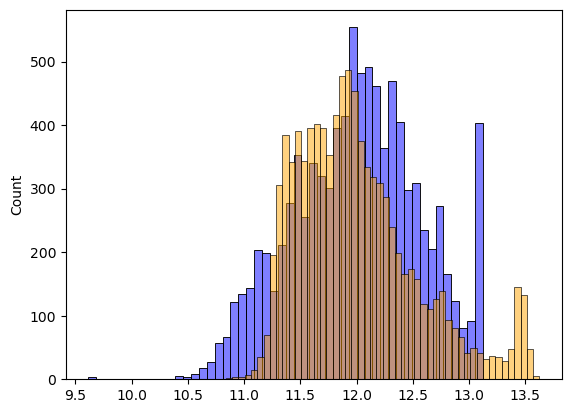

In [517]:
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
sns.histplot(y_pred, color='orange', alpha=0.5, bins=50)

In [518]:
# implement RMSE - root mean squared error
def RMSE(pred, actual):
    E = pred - actual
    S = np.square(E)
    M = np.mean(S)
    R = np.sqrt(M)
    
    return round(R, 2)

In [519]:
RMSE(y_pred, y_train)

0.17

In [520]:
# preparing for validation
# df_val.values
X_val = df_val.fillna(n_mean).values
y_pred_val = w0 + X_val.dot(w)
RMSE(y_pred_val, y_val)

0.17

In [521]:
# using the zero filled option
df_train.total_bedrooms = z_df
train_linear_regression(df_train, y_train)

(3.774885804784426,
 array([-9.65611661e-02, -9.07968011e-02, -2.23497541e-03,  6.23742324e-06,
         3.12783253e-06, -3.27682435e-06, -4.86436987e-07,  6.54265884e-03,
         4.46218265e-06]))

In [522]:
# preparing for training
X_train = df_train.values
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

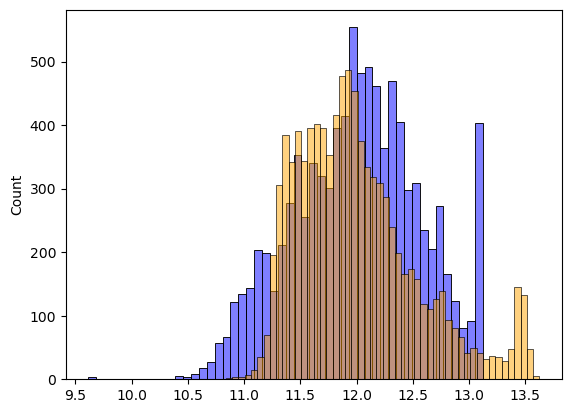

In [523]:
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
sns.histplot(y_pred, color='orange', alpha=0.5, bins=50)

In [524]:
RMSE(y_pred, y_train)

0.17

In [525]:
# preparing for validation
# df_val.values
X_val = df_val.fillna(0).values
y_pred_val = w0 + X_val.dot(w)
RMSE(y_pred_val, y_val)

0.17

In [2]:
# RMSE on test
y_pred_test = w0 + X_val.dot(w)
RMSE(y_pred_test, y_test)

NameError: name 'w0' is not defined

In [48]:
def blackjack_hand_greater_than(hand_1, hand_2):
    """
    Return True if hand_1 beats hand_2, and False otherwise.
    
    In order for hand_1 to beat hand_2 the following must be true:
    - The total of hand_1 must not exceed 21
    - The total of hand_1 must exceed the total of hand_2 OR hand_2's total must exceed 21
    
    Hands are represented as a list of cards. Each card is represented by a string.
    
    When adding up a hand's total, cards with numbers count for that many points. Face
    cards ('J', 'Q', and 'K') are worth 10 points. 'A' can count for 1 or 11.
    
    When determining a hand's total, you should try to count aces in the way that 
    maximizes the hand's total without going over 21. e.g. the total of ['A', 'A', '9'] is 21,
    the total of ['A', 'A', '9', '3'] is 14.
    
    Examples:
    >>> blackjack_hand_greater_than(['K'], ['3', '4'])
    True
    >>> blackjack_hand_greater_than(['K'], ['10'])
    False
    >>> blackjack_hand_greater_than(['K', 'K', '2'], ['3'])
    False
    """
    def help_func(hand):
        key_val = {'J':10, 'Q':10, 'K':10}
        total = 0
        A_count = 0
        for i in hand:
            if i == 'A':
                A_count += 1
#                 print(A_count)
#                 hand.pop(hand.index(i))
                continue
            elif i in key_val.keys():
                total += key_val[i]
                continue
            total += int(i)
#             print(total)
        if (total + (A_count*11)) <= 21:
#             print(total, A_count)
#             print(total + (A_count*11))
            return (total + (A_count*11))
        else:
#             print(total, A_count)
#             print(total + (A_count*1))
            return (total + (A_count*1))
    sum1 = help_func(hand_1)
    sum2 = help_func(hand_2)
               
    if sum1 <= 21 and sum1 > sum2 or sum1 <= 21 and sum2 > 21:
        return True
    
    return False
# Check your answer

In [49]:
# blackjack_hand_greater_than(hand_1=['2', '10', '5', 'A', '9', '9'], hand_2=['5', '7', '5', 'Q', '5'])
# blackjack_hand_greater_than(['J', 'A'], ['6'])
blackjack_hand_greater_than(hand_1=['5', '2', 'A', '5', '10'], hand_2=['5', '8', '10', '7', 'J'])

False